# libraries and data imports

In [3]:
import csv
import datetime as dt
import json
import os
import statistics
import time
from ast import literal_eval
import itertools
import re

# third-party imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# increase default row display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [178]:
df_streaming_data = pd.read_csv('datasets/streaming_data.csv')

In [179]:
df_track_data = pd.read_csv('datasets/track_data.csv')

In [93]:
df_streaming_data = pd.read_csv('datasets/streaming_data_ready.csv')
df_track_data = pd.read_csv('datasets/track_data_ready.csv')

# preparing the data

In [180]:
display(df_streaming_data.describe().round(2))
display(df_track_data.describe().round(2))

,index,msPlayed,track_popularity,track_duration,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,track_time_signature,sPlayed
count,22069.00,22069.00,22069.00,22069.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,10024.00,22069.00
mean,11049.70,166688.01,41.05,194260.19,0.61,0.38,5.66,-11.96,0.82,0.08,0.59,0.04,0.17,0.41,121.40,3.92,166.69
std,6382.06,79430.85,11.91,48062.63,0.16,0.25,2.94,5.47,0.39,0.06,0.36,0.12,0.11,0.22,29.49,0.31,79.43
min,0.00,0.00,0.00,22000.00,0.21,0.01,0.00,-42.72,0.00,0.02,0.00,0.00,0.03,0.04,63.97,1.00,0.00
25%,5523.00,150937.00,34.00,174000.00,0.50,0.16,4.00,-15.93,1.00,0.04,0.19,0.00,0.10,0.25,98.00,4.00,150.94
50%,11044.00,183823.00,41.00,189693.00,0.63,0.30,6.00,-11.12,1.00,0.05,0.73,0.00,0.12,0.35,115.97,4.00,183.82
75%,16575.00,203553.00,47.00,213611.00,0.75,0.59,8.00,-7.63,1.00,0.09,0.92,0.01,0.25,0.57,137.92,4.00,203.55
max,22111.00,1082813.00,88.00,619066.00,0.88,0.96,11.00,-1.73,1.00,0.41,0.99,0.93,0.84,0.98,207.91,5.00,1082.81


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00
mean,0.59,0.52,5.13,-8.89,0.76,0.07,0.42,0.07,0.17,0.47,120.47,208110.96,3.90
std,0.15,0.25,3.61,4.54,0.43,0.07,0.35,0.21,0.13,0.24,30.62,59899.67,0.41
min,0.16,0.01,0.00,-42.72,0.00,0.02,0.00,0.00,0.02,0.04,36.02,22000.00,1.00
25%,0.49,0.32,2.00,-11.07,1.00,0.03,0.08,0.00,0.10,0.27,96.28,177603.00,4.00
50%,0.60,0.52,5.00,-7.93,1.00,0.04,0.34,0.00,0.12,0.46,118.11,205245.50,4.00
75%,0.70,0.73,8.00,-5.51,1.00,0.07,0.77,0.00,0.20,0.66,138.75,237404.75,4.00
max,0.96,0.99,11.00,-0.59,1.00,0.93,0.99,0.96,0.92,0.98,207.93,619067.00,5.00


In [181]:
display(df_streaming_data.isnull().sum())
display(df_track_data.isnull().sum())

index                         0
endTime                       0
artistName                    0
trackName                     0
msPlayed                      0
track_id                      0
track_popularity              0
track_duration                0
track_explicit                0
track_danceability        12045
track_energy              12045
track_key                 12045
track_loudness            12045
track_mode                12045
track_speechiness         12045
track_acousticness        12045
track_instrumentalness    12045
track_liveness            12045
track_valence             12045
track_tempo               12045
track_time_signature      12045
sPlayed                       0
dtype: int64

track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [182]:
# drop track_danceability, track_energy, track_key, track_loudness, track_mode, track_speechiness , track_acousticness, track_instrumentalness, track_liveness , track_valence, track_tempo, track_time_signature
df_streaming_data.drop(columns=['track_danceability', 'track_energy', 'track_key', 'track_loudness', 'track_mode', 'track_speechiness' , 'track_acousticness', 'track_instrumentalness', 'track_liveness' , 'track_valence', 'track_tempo', 'track_time_signature'], inplace=True)

In [183]:
# columns data type
display(df_streaming_data.dtypes)
display(df_track_data.dtypes)


index                 int64
endTime              object
artistName           object
trackName            object
msPlayed              int64
track_id             object
track_popularity    float64
track_duration      float64
track_explicit         bool
sPlayed             float64
dtype: object

track_id             object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [184]:
# convert cols to datetime
df_streaming_data['endTime'] = pd.to_datetime(df_streaming_data['endTime'])
df_streaming_data['msPlayed_dt'] = pd.to_timedelta(df_streaming_data['msPlayed'], unit='ms')
df_track_data['duration_ms_dt'] = pd.to_timedelta(df_track_data['duration_ms'], unit='ms')

In [185]:
# filter data to only 2023
df_streaming_data = df_streaming_data[df_streaming_data['endTime'].dt.year == 2023]

In [186]:
# print msPlayed_dt total minutes
print(df_streaming_data['msPlayed_dt'].sum() / pd.Timedelta(minutes=1))

48315.90198333334


In [187]:
compactViewCols = ['endTime', 'artistName', 'trackName', 'msPlayed_dt', 'track_id']

In [188]:
# remove all Unknown Artist rows
df_streaming_data = df_streaming_data[df_streaming_data['artistName'] != 'Unknown Artist']

In [189]:
#get only unique trackName and artistName in df_streaming_data
df_streaming_data_unique = df_streaming_data.drop_duplicates(subset=['track_id', 'trackName', 'artistName'])

In [190]:
print(df_streaming_data_unique.shape)
print(df_streaming_data_unique['track_id'].nunique())

(818, 11)
814


In [191]:
# show duplicate rows from df_streaming_data_unique
df_streaming_data_unique[df_streaming_data_unique.duplicated(subset=['track_id'], keep=False)].sort_values(by=['trackName', 'artistName'])

,index,endTime,artistName,trackName,msPlayed,track_id,track_popularity,track_duration,track_explicit,sPlayed,msPlayed_dt
5032,5038,2023-01-02 05:29:00,dodie,.,83264,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,83.264,0 days 00:01:23.264000
5024,5030,2023-01-02 05:08:00,dodie,?,72035,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,72.035,0 days 00:01:12.035000
5856,5862,2023-01-19 15:34:00,Laufey,Love to Keep Me Warm,211989,3bq7dXN7arTdaq8mmKXxob,64.0,158133.0,False,211.989,0 days 00:03:31.989000
6332,6338,2023-01-23 10:59:00,Wasia Project,Why Don't U Love Me,158962,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,158.962,0 days 00:02:38.962000
7378,7384,2023-02-08 06:05:00,Wasia Project,why don't u love me? - re-recorded,216612,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,216.612,0 days 00:03:36.612000
6367,6373,2023-01-27 02:54:00,Wasia Project,why dont u love me? - re-recorded,20239,4E7gBwAIuKqyd16eHwY1gF,49.0,216612.0,False,20.239,0 days 00:00:20.239000


In [192]:
# update trackName for track_id "4E7gBwAIuKqyd16eHwY1gF" to "why don't u love me? - re-recorded"
df_streaming_data.loc[df_streaming_data['track_id'] == '4E7gBwAIuKqyd16eHwY1gF', 'trackName'] = "why don't u love me? - re-recorded"

In [193]:
# drop rows with track_name '.' and '?' from df_streaming_data since their track_id is wrong
df_streaming_data = df_streaming_data[df_streaming_data['trackName'] != '.']
df_streaming_data = df_streaming_data[df_streaming_data['trackName'] != '?']

In [195]:
#get only unique trackName and artistName in df_streaming_data
df_streaming_data_unique = df_streaming_data.drop_duplicates(subset=['track_id', 'trackName', 'artistName'])

In [196]:
print(df_streaming_data_unique.shape)
print(df_streaming_data_unique['track_id'].nunique())

(814, 11)
814


In [198]:
df_streaming_data_unique.reset_index(drop=True, inplace=True)

In [201]:
# get trackName and artistName from streaming_data_unique
df_track_data['trackName'] = df_track_data['track_id'].map(df_streaming_data_unique.set_index('track_id')['trackName'])
df_track_data['artistName'] = df_track_data['track_id'].map(df_streaming_data_unique.set_index('track_id')['artistName'])

In [207]:
# remove all rows with NaN trackName and artistName
df_track_data = df_track_data[df_track_data['trackName'].notna()]

In [215]:
# show number of unique values in each column
display(df_track_data.nunique())

track_id            814
danceability        422
energy              537
key                  12
loudness            792
mode                  2
speechiness         467
acousticness        620
instrumentalness    504
liveness            427
valence             537
tempo               804
type                  1
id                  814
uri                 814
track_href          814
analysis_url        814
duration_ms         802
time_signature        4
duration_ms_dt      802
trackName           800
artistName          348
dtype: int64

In [216]:
# drop id and type columns because they are redundant and not useful
df_track_data.drop(columns=['id', 'type'], inplace=True)

In [98]:
# group by track_id and get the number of appearances of each track_id and sum the duration_ms from streaming_data
df_track_data_grouped = df_streaming_data.groupby('track_id').agg({'msPlayed_dt': 'sum', 'endTime': 'count'}).reset_index()

In [99]:
df_track_data_grouped.columns = ['track_id', 'msPlayed_total', 'num_played']

In [100]:
df_track_data_grouped.sort_values(by=['num_played'], ascending=False).head(5)

,track_id,msPlayed_total,num_played
62,0c0vb1jBQTxvtGRt9RKZnE,0 days 17:22:09.519000,328
633,6BSDpXlm2gtorEzoH4RNHw,0 days 09:32:59.714000,292
43,0RyQTFH6hABT79RpSsVJU4,0 days 13:14:52.165000,279
797,7oIGWbgAbukbtTIdxnlIwd,0 days 10:53:23.582000,260
332,3AlbodF0tKd4Pzhm2wbZdU,0 days 10:47:35.969000,259


In [237]:
df_track_data_grouped.sort_values(by=['num_played'], ascending=False).head(5)

,track_id,msPlayed_total,num_played
62,0c0vb1jBQTxvtGRt9RKZnE,0 days 17:22:09.519000,328
633,6BSDpXlm2gtorEzoH4RNHw,0 days 09:32:59.714000,292
43,0RyQTFH6hABT79RpSsVJU4,0 days 13:14:52.165000,279
797,7oIGWbgAbukbtTIdxnlIwd,0 days 10:53:23.582000,260
332,3AlbodF0tKd4Pzhm2wbZdU,0 days 10:47:35.969000,259


In [104]:
# get trackName and artistName from streaming_data_unique
df_track_data['total_played_duration'] = df_track_data['track_id'].map(df_track_data_grouped.set_index('track_id')['msPlayed_total'])
df_track_data['total_played_count'] = df_track_data['track_id'].map(df_track_data_grouped.set_index('track_id')['num_played'])

In [105]:
df_track_data[df_track_data['track_id'] == '6BSDpXlm2gtorEzoH4RNHw']

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,duration_ms_dt,trackName,artistName,total_played_duration,total_played_count
214,6BSDpXlm2gtorEzoH4RNHw,0.789,0.212,3,-11.85,1,0.0493,0.85,0.000031,0.107,...,spotify:track:6BSDpXlm2gtorEzoH4RNHw,https://api.spotify.com/v1/tracks/6BSDpXlm2gto...,https://api.spotify.com/v1/audio-analysis/6BSD...,124365,3,0 days 00:02:04.365000,Words Ain't Enough,Tessa Violet,0 days 09:32:59.714000,292


In [107]:
# save the new data to csv
df_track_data.to_csv('datasets/track_data_ready.csv', index=False)
df_streaming_data.to_csv('datasets/streaming_data_ready.csv', index=False)

# similarity between tracks

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [110]:
df_track_data['track'] = df_track_data['artistName'] + ' - ' + df_track_data['trackName']

In [111]:
df_track_data.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'duration_ms_dt', 'trackName', 'artistName',
       'total_played_duration', 'total_played_count', 'track'],
      dtype='object')

In [153]:
cols = ['track', 'total_played_duration', 'total_played_count', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo']

In [154]:
df_tracks = df_track_data[cols]

In [155]:
df_tracks.columns

Index(['track', 'total_played_duration', 'total_played_count', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [156]:
df_tracks.nunique()

track                    814
total_played_duration    811
total_played_count        99
danceability             422
energy                   537
key                       12
loudness                 792
speechiness              467
acousticness             620
instrumentalness         504
liveness                 427
valence                  537
tempo                    804
dtype: int64

In [157]:
df_tracks.describe()

,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,814,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0 days 00:59:13.181476658,20.886978,0.590898,0.518777,5.154791,-8.915489,0.069221,0.421912,0.065983,0.170824,0.479267,120.006069
std,0 days 02:11:09.952618855,45.294684,0.145071,0.249440,3.595558,4.538861,0.069424,0.346678,0.204878,0.130153,0.245178,30.513064
min,0 days 00:00:00,1.000000,0.198000,0.008350,0.000000,-25.277000,0.022900,0.000003,0.000000,0.021200,0.039100,36.019000
25%,0 days 00:04:40.583000,2.000000,0.493250,0.319250,2.000000,-11.238250,0.034800,0.085600,0.000000,0.096425,0.274000,96.001250
50%,0 days 00:10:34.030500,4.000000,0.599000,0.514000,5.000000,-7.942500,0.045100,0.341500,0.000022,0.118000,0.460000,118.062000
75%,0 days 00:25:03.745750,8.000000,0.704000,0.734750,8.000000,-5.458500,0.070775,0.783750,0.002538,0.200250,0.677750,137.986250
max,0 days 17:22:09.519000,328.000000,0.962000,0.990000,11.000000,-0.589000,0.776000,0.993000,0.962000,0.922000,0.981000,207.927000


In [175]:
df_streaming_data.shape

(17002, 11)

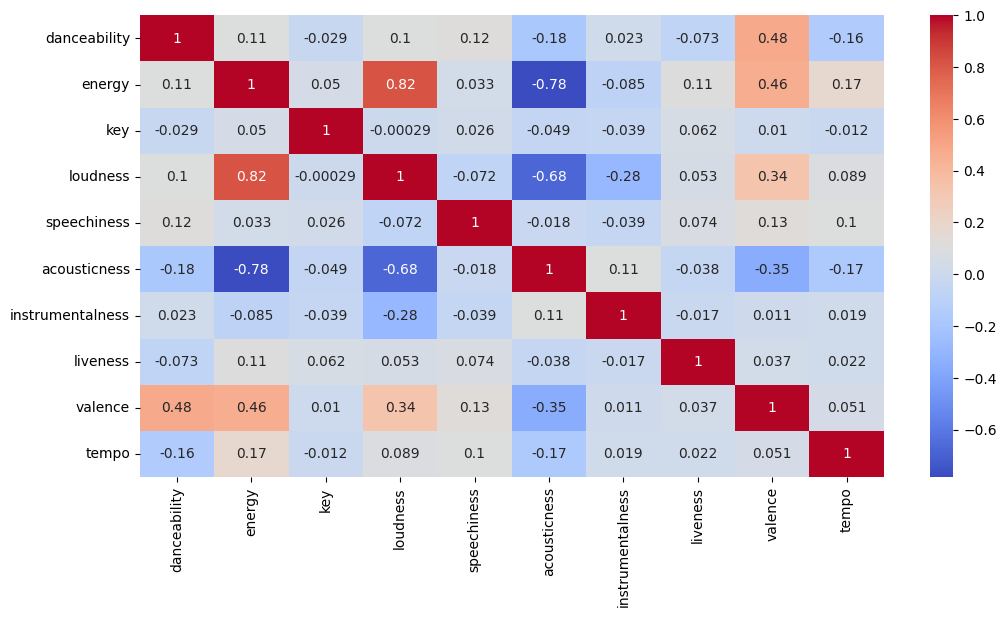

In [158]:
# visualize correlation between features in df_tracks
plt.figure(figsize=(12,6))
sns.heatmap(df_tracks.iloc[:,3:].corr(), annot=True, cmap='coolwarm')
plt.show()

In [159]:
# normalize df_tracks features (except track)
df_tracks_norm = df_tracks.copy()
df_tracks_norm.iloc[:, 3:] = normalize(df_tracks_norm.iloc[:, 3:], axis=0)


In [160]:
df_tracks_norm.describe()

,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,814,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,8.140000e+02,814.000000,814.000000,814.000000,814.000000
mean,0 days 00:59:13.181476658,20.886978,0.034040,0.031592,0.028753,-0.031239,0.024755,2.708736e-02,0.010751,0.027886,0.031208,0.033970
std,0 days 02:11:09.952618855,45.294684,0.008357,0.015190,0.020056,0.015904,0.024828,2.225724e-02,0.033381,0.021247,0.015965,0.008637
min,0 days 00:00:00,1.000000,0.011406,0.000508,0.000000,-0.088568,0.008190,1.746278e-07,0.000000,0.003461,0.002546,0.010196
25%,0 days 00:04:40.583000,2.000000,0.028415,0.019441,0.011156,-0.039378,0.012446,5.495641e-03,0.000000,0.015741,0.017842,0.027175
50%,0 days 00:10:34.030500,4.000000,0.034507,0.031301,0.027890,-0.027830,0.016129,2.192478e-02,0.000004,0.019263,0.029953,0.033420
75%,0 days 00:25:03.745750,8.000000,0.040556,0.044744,0.044624,-0.019126,0.025311,5.031786e-02,0.000413,0.032690,0.044132,0.039060
max,0 days 17:22:09.519000,328.000000,0.055419,0.060288,0.061358,-0.002064,0.277521,6.375200e-02,0.156740,0.150511,0.063879,0.058858


In [161]:
# show variance, mean, and std of each column
display(df_tracks_norm.iloc[:,3:].var())
display(df_tracks_norm.iloc[:,3:].mean())
display(df_tracks_norm.iloc[:,3:].std())

danceability        0.000070
energy              0.000231
key                 0.000402
loudness            0.000253
speechiness         0.000616
acousticness        0.000495
instrumentalness    0.001114
liveness            0.000451
valence             0.000255
tempo               0.000075
dtype: float64

danceability        0.034040
energy              0.031592
key                 0.028753
loudness           -0.031239
speechiness         0.024755
acousticness        0.027087
instrumentalness    0.010751
liveness            0.027886
valence             0.031208
tempo               0.033970
dtype: float64

danceability        0.008357
energy              0.015190
key                 0.020056
loudness            0.015904
speechiness         0.024828
acousticness        0.022257
instrumentalness    0.033381
liveness            0.021247
valence             0.015965
tempo               0.008637
dtype: float64

In [172]:
cosine_similarity_array = cosine_similarity(df_tracks.iloc[:, 3:])

In [173]:
similarity_df = pd.DataFrame(cosine_similarity_array, index=df_tracks['track'], columns=df_tracks['track'])

In [170]:
df_track_data[['track', 'total_played_duration', 'total_played_count']][df_track_data['artistName'] == 'dodie'].sort_values(by=['total_played_duration'], ascending=False).head(10)

,track,total_played_duration,total_played_count
184,dodie - Hate Myself - Georgia Remix,0 days 05:03:17.571000,85
181,dodie - In The Middle,0 days 04:12:47.028000,94
25,dodie - Got Weird,0 days 03:53:56.371000,77
29,dodie - Sick of Losing Soulmates,0 days 03:47:15.600000,63
180,dodie - Monster,0 days 03:29:25.449000,58
141,dodie - Lonely Bones,0 days 03:27:22.135000,71
177,dodie - If I'm Being Honest,0 days 03:20:14.940000,53
145,dodie - Human,0 days 03:09:06.943000,62
146,dodie - Absolutely Smitten,0 days 03:07:51.065000,66
187,dodie - Party Tattoos,0 days 03:04:55.246000,56


In [174]:
similarity_df["dodie - Absolutely Smitten"].sort_values(ascending=False).head(10)

track
dodie - Absolutely Smitten                1.000000
Daisy the Great - Woods                   0.999984
Lauren Aquilina - Tobacco In My Sheets    0.999973
THREE1989 - Rambling Rose                 0.999961
Danilla - Senja Di Ambang Pilu            0.999954
Lizzy McAlpine - Pancakes for Dinner      0.999942
Nataly Dawn - Coffee Baby                 0.999942
The Arcadian Wild - The Graduate          0.999939
Rusty Clanton - Novels                    0.999935
Quail - Blue Sky                          0.999935
Name: dodie - Absolutely Smitten, dtype: float64

In [166]:
similarity_df.head(5)

track,Orla Gartland - Codependency,The 1975 - Be My Mistake,Daisy the Great - IDKW,Alvvays - Dreams Tonite,Wasia Project - ur so pretty,girli - More Than a Friend,Baby Queen - Colours Of You,Tessa Violet - Bad Ideas,beabadoobee - Dance with Me,Orla Gartland - Why Am I Like This?,...,stories - That Thing You Do,Lawrence - Quarantined With You,Lawrence - Misty Morning,Lawrence - False Alarms (with Jon Bellion),Lawrence - Me & You,Lawrence - More,Scary Pockets - deja vu,Lawrence - i'm confident that i'm insecure (acoustic-ish),Couch - Fall Into Place,Victor Franco - Glad I'm Not Alone
track,,,,,,,,,,,,,,,,,,,,,
Orla Gartland - Codependency,1.000000,0.652014,0.817460,0.920542,0.664005,0.855710,0.805416,0.692303,0.687590,0.915899,...,0.628646,0.705616,0.798743,0.871353,0.869036,0.927263,0.800177,0.952700,0.841259,0.753699
The 1975 - Be My Mistake,0.652014,1.000000,0.565539,0.631626,0.965739,0.609604,0.908288,0.687209,0.931063,0.854584,...,0.934455,0.944869,0.790052,0.567021,0.660498,0.767233,0.641001,0.541750,0.765403,0.725667
Daisy the Great - IDKW,0.817460,0.565539,1.000000,0.635059,0.656803,0.630232,0.635129,0.792986,0.643933,0.790145,...,0.635735,0.680536,0.754827,0.703698,0.886094,0.858504,0.759622,0.869554,0.583047,0.587327
Alvvays - Dreams Tonite,0.920542,0.631626,0.635059,1.000000,0.632079,0.961029,0.841626,0.693863,0.663381,0.870583,...,0.612625,0.683968,0.836309,0.932919,0.821387,0.842317,0.826242,0.885531,0.886892,0.823418
Wasia Project - ur so pretty,0.664005,0.965739,0.656803,0.632079,1.000000,0.611867,0.900134,0.705374,0.950556,0.883556,...,0.968355,0.973723,0.795853,0.579937,0.725786,0.784585,0.645412,0.621969,0.729048,0.688549


In [167]:
# save the similarity data to csv
similarity_df.to_csv('datasets/similarity_data.csv')

# clustering the tracks

In [186]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [179]:
df_track_data.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_href,analysis_url,duration_ms,time_signature,duration_ms_dt,trackName,artistName,total_played_duration,total_played_count,track
0,0o2BJHj9wQTCb5UfY7R7jl,0.805,0.606,4,-5.506,1,0.0500,0.1070,0.000000,0.3690,...,https://api.spotify.com/v1/tracks/0o2BJHj9wQTC...,https://api.spotify.com/v1/audio-analysis/0o2B...,191881,4,0 days 00:03:11.881000,Codependency,Orla Gartland,0 days 02:55:30.420000,70,Orla Gartland - Codependency
1,18UsAG7SfOQ5sxJEdjAMH0,0.572,0.155,6,-14.405,1,0.0344,0.8350,0.000137,0.0906,...,https://api.spotify.com/v1/tracks/18UsAG7SfOQ5...,https://api.spotify.com/v1/audio-analysis/18Us...,256689,3,0 days 00:04:16.689000,Be My Mistake,The 1975,0 days 00:04:38.234000,5,The 1975 - Be My Mistake
2,488BT4GxCDKGqnK77wQWeG,0.599,0.541,2,-6.984,1,0.2990,0.8170,0.000000,0.8340,...,https://api.spotify.com/v1/tracks/488BT4GxCDKG...,https://api.spotify.com/v1/audio-analysis/488B...,105898,4,0 days 00:01:45.898000,IDKW,Daisy the Great,0 days 01:40:28.707000,67,Daisy the Great - IDKW
3,6TcxxINfeaBEQ35sHMldTD,0.510,0.622,2,-5.727,1,0.0242,0.0108,0.000004,0.1270,...,https://api.spotify.com/v1/tracks/6TcxxINfeaBE...,https://api.spotify.com/v1/audio-analysis/6Tcx...,196027,4,0 days 00:03:16.027000,Dreams Tonite,Alvvays,0 days 00:16:28.998000,6,Alvvays - Dreams Tonite
4,1Jt24MPLz6fGXSCTlXTjzF,0.322,0.231,4,-12.919,1,0.0347,0.9320,0.000760,0.1490,...,https://api.spotify.com/v1/tracks/1Jt24MPLz6fG...,https://api.spotify.com/v1/audio-analysis/1Jt2...,132000,3,0 days 00:02:12,ur so pretty,Wasia Project,0 days 01:46:20.419000,53,Wasia Project - ur so pretty


In [180]:
df_track_data.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'duration_ms_dt', 'trackName', 'artistName',
       'total_played_duration', 'total_played_count', 'track'],
      dtype='object')

In [246]:
cols = ['track', 'artistName', 'total_played_duration', 'total_played_count', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms']
df_tracks_cluster = df_track_data[cols]

In [247]:
df_tracks_cluster['total_played_duration_s'] = df_tracks_cluster['total_played_duration'].dt.total_seconds()

C:\Users\nazhi\AppData\Local\Temp\ipykernel_16844\218761114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks_cluster['total_played_duration_s'] = df_tracks_cluster['total_played_duration'].dt.total_seconds()


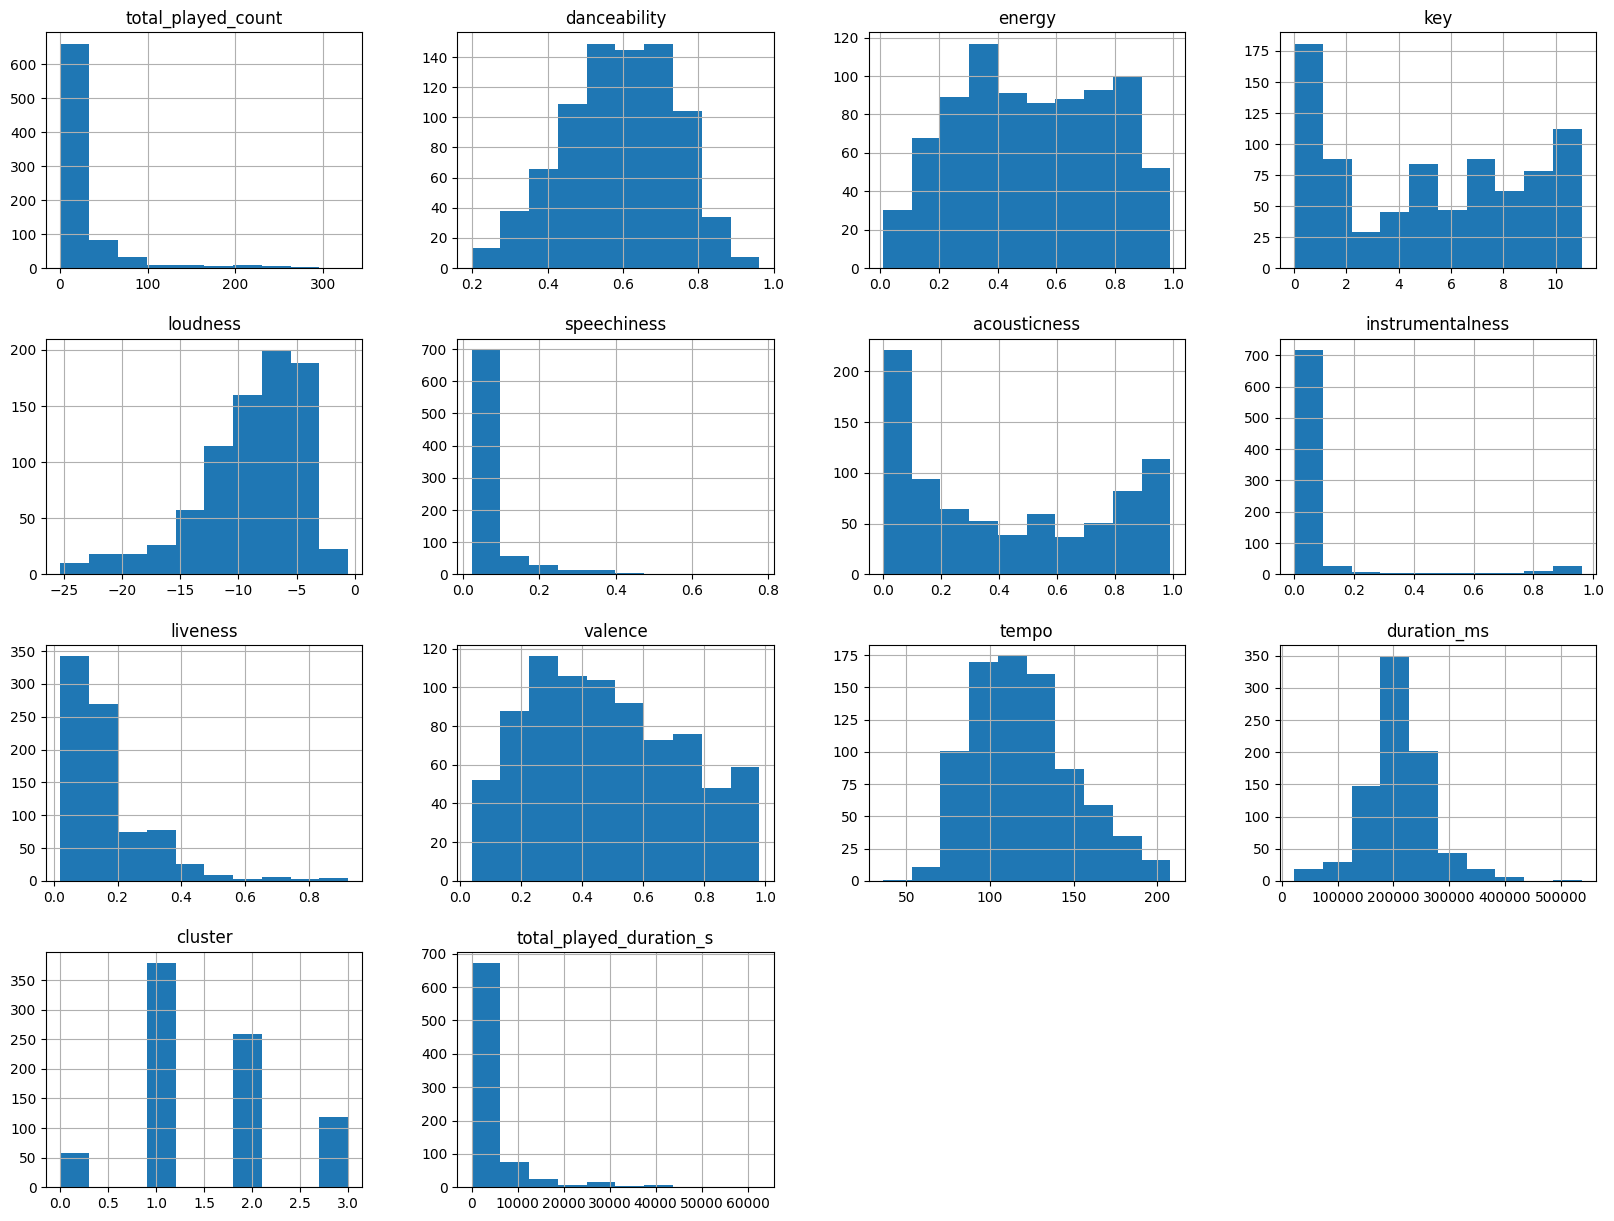

In [214]:
# visualize df_track_cluster each feature distribution
df_tracks_cluster.hist(figsize=(20,15))
plt.show()


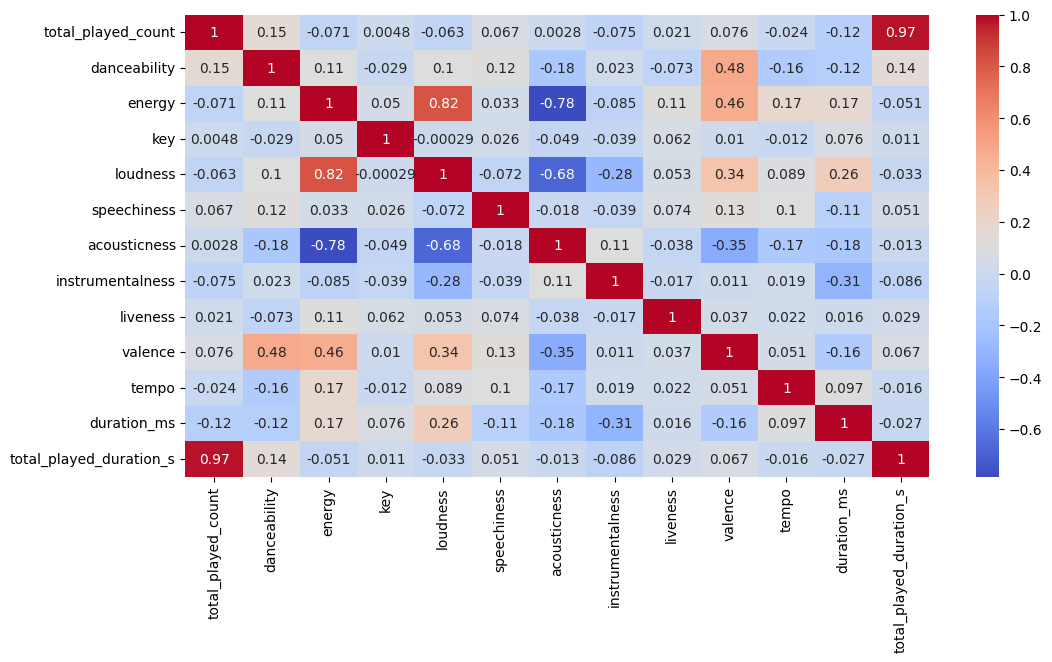

In [248]:
# visualize correlation between features in df_tracks_cluster
plt.figure(figsize=(12,6))
sns.heatmap(df_tracks_cluster.iloc[:,3:].corr(), annot=True, cmap='coolwarm')
plt.show()

c:\Users\nazhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nazhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nazhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nazhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

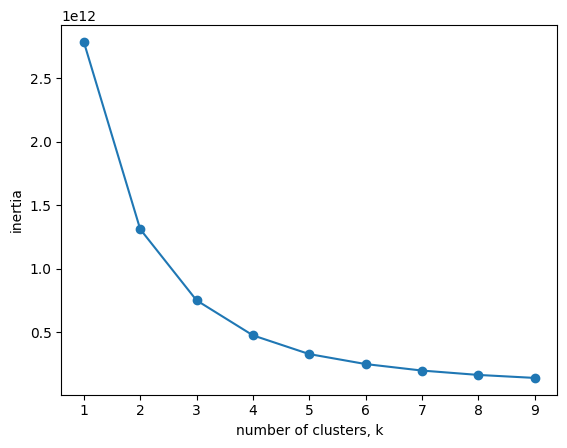

In [249]:
# visualize elbow method to find the best number of clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(df_tracks_cluster.iloc[:,3:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

#plot ks vs inertia
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

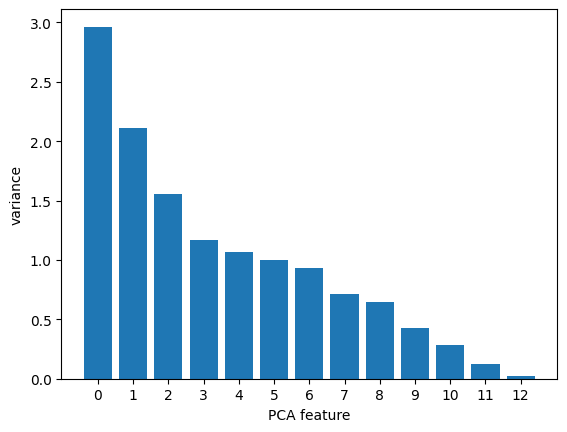

In [250]:
#visualize pca
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_tracks_cluster.iloc[:,3:])

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [251]:
# now that we kinda know the best number of clusters and number of components for PCA, let's do it
# Create scaler: scaler
scaler = StandardScaler()
#scaling data
scaler.fit(df_tracks_cluster.iloc[:,3:])
scaled_features = scaler.transform(df_tracks_cluster.iloc[:,3:])
# Create a PCA instance: pca
pca = PCA(n_components=3)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)
# Fit the pipeline to 'samples'
pipeline.fit(df_tracks_cluster.iloc[:,3:])
# Transform the scaled samples: pca_features
pca_features = pipeline.transform(df_tracks_cluster.iloc[:,3:])

km = KMeans(n_clusters=4, random_state=0)
km.fit(pca_features)
labels = km.predict(pca_features)


c:\Users\nazhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


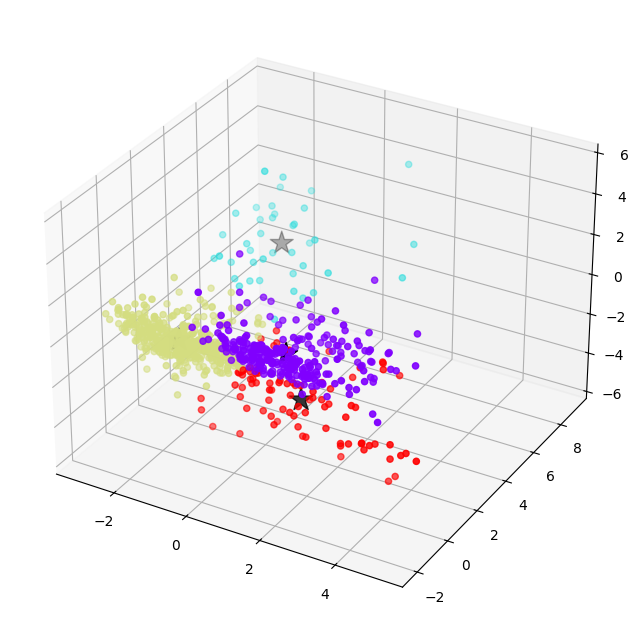

In [276]:
# visualize the cluster and its center in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], c=labels, cmap='rainbow')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], marker='*', s=300, c='black')
plt.show()

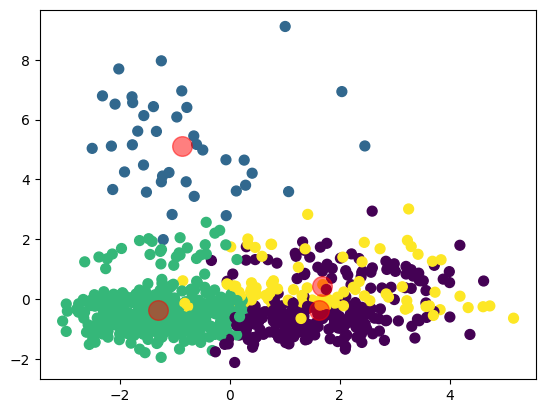

In [275]:
# visualize the cluster and its center but only for 2 features
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()


In [277]:
df_tracks_cluster['cluster'] = labels

C:\Users\nazhi\AppData\Local\Temp\ipykernel_16844\234463474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks_cluster['cluster'] = labels


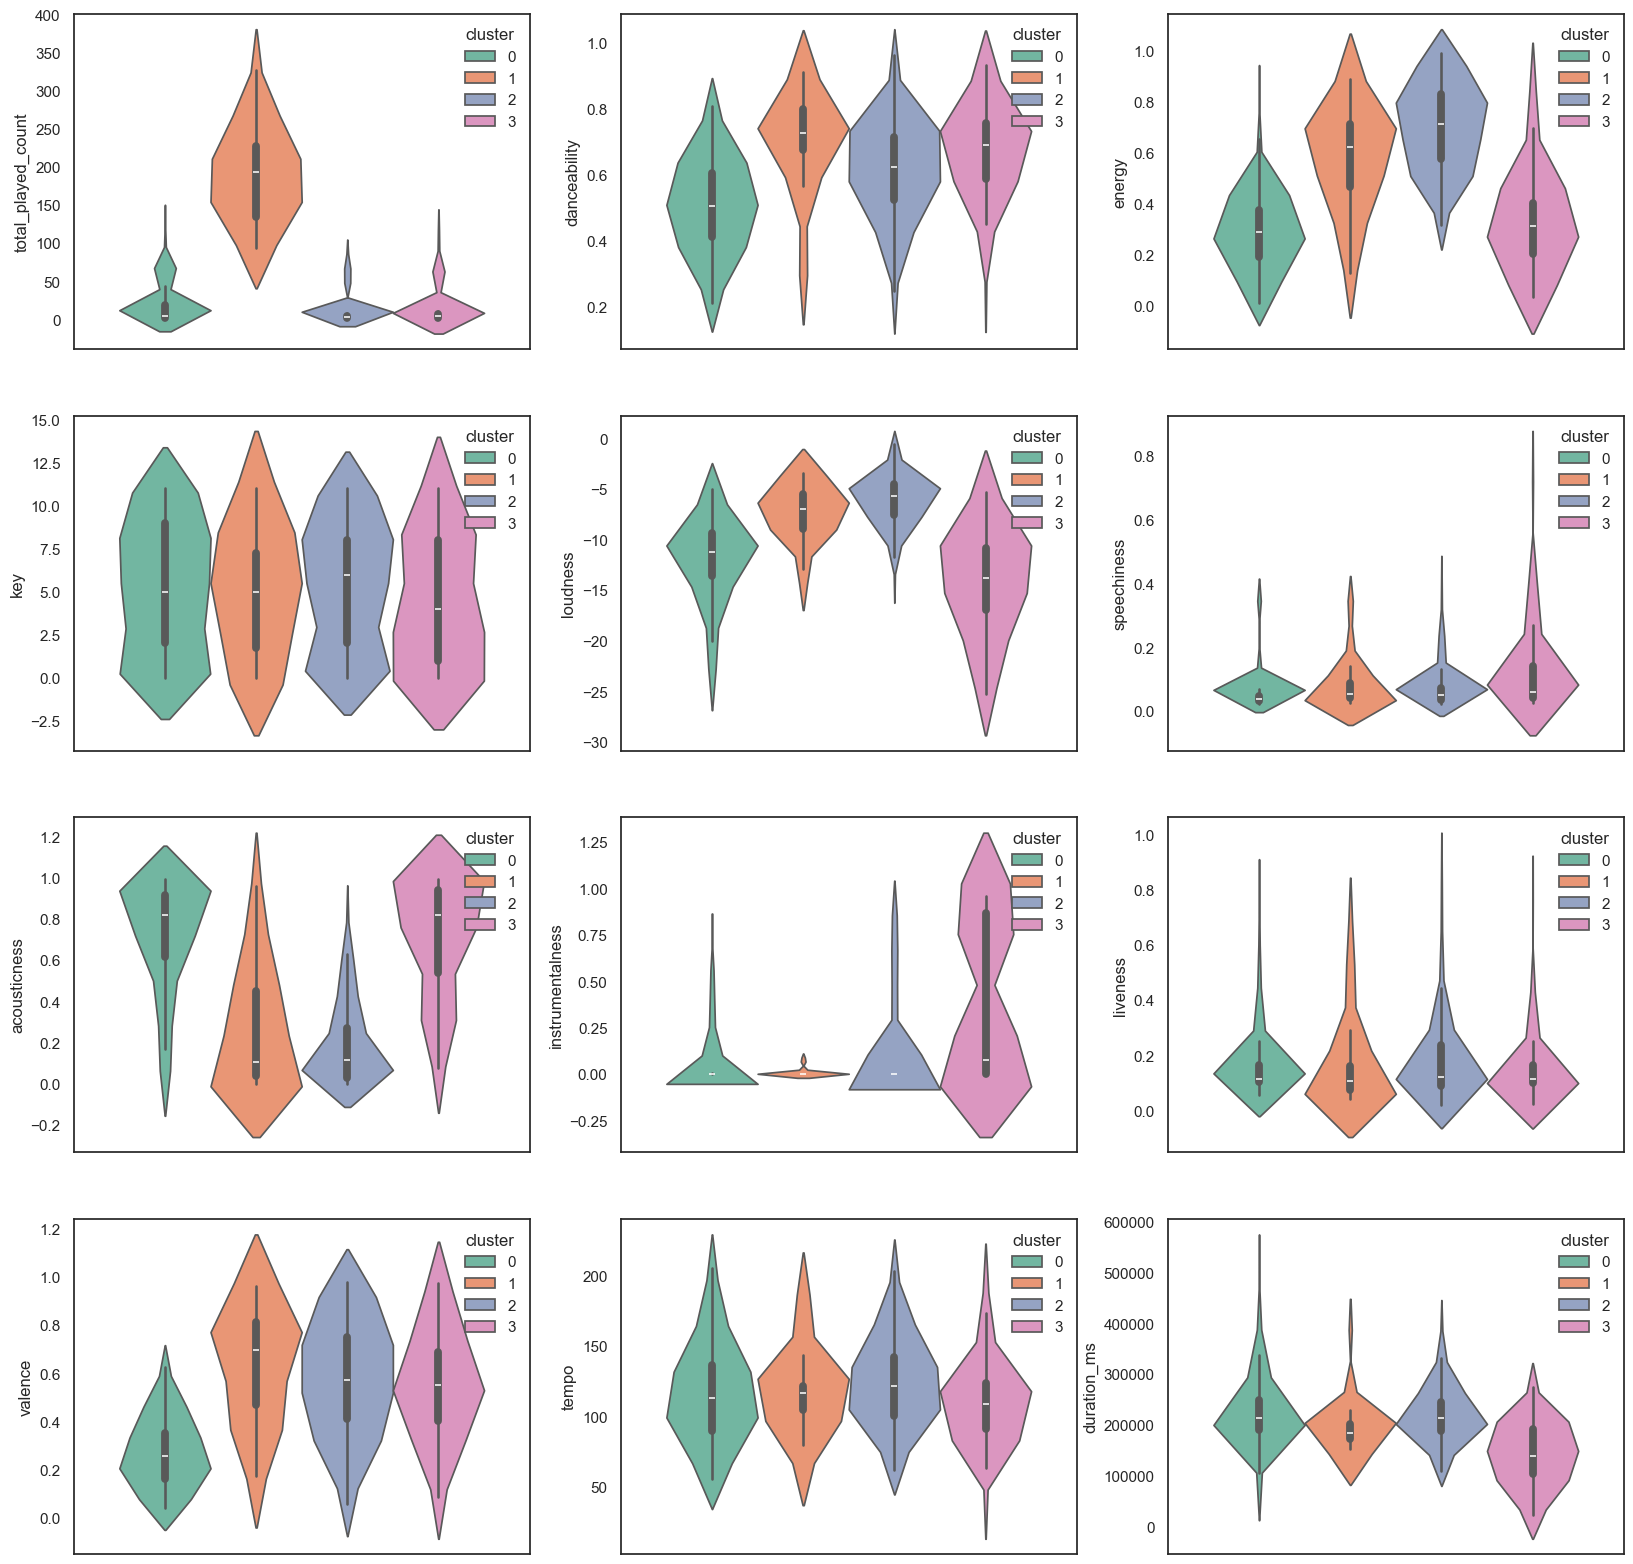

In [343]:
# visualize each feature distribution of each clusters with seaborn's violinplot with 3 figures per row
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < 12:
        sns.violinplot(hue='cluster', y=df_tracks_cluster.columns[i+3], data=df_tracks_cluster, ax=ax, palette='Set2', gridsize=7)
        sns.move_legend(ax, loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
    else:
        ax.set_visible(False)
        
plt.show()


In [350]:
for cluster in range(4):
    print(f'cluster {cluster}')
    display(df_tracks_cluster[df_tracks_cluster['cluster'] == cluster].sort_values(by=['total_played_count','total_played_duration_s'], ascending=False).head(10))
    display(df_tracks_cluster[df_tracks_cluster['cluster'] == cluster].sort_values(by=['total_played_count','total_played_duration_s'], ascending=False).tail(10))

cluster 0


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
138,Us The Duo - La La La,Us The Duo,0 days 07:05:00.881000,134,0.462,0.1610,7,-14.498,0.0497,0.979,0.000227,0.2310,0.172,140.256,224848,25500.881,0
44,Wasia Project - why don't u love me? - re-reco...,Wasia Project,0 days 04:17:11.584000,96,0.474,0.3100,5,-12.151,0.0358,0.570,0.000055,0.3240,0.241,125.925,216613,15431.584,0
194,Wasia Project - My Vine,Wasia Project,0 days 04:36:26.512000,95,0.342,0.0781,5,-21.823,0.0372,0.965,0.010700,0.1180,0.139,72.947,188082,16586.512,0
40,Orla Gartland - Madison,Orla Gartland,0 days 04:04:24.737000,79,0.523,0.2860,5,-7.634,0.0923,0.458,0.000000,0.1130,0.337,205.336,224639,14664.737,0
80,Orla Gartland - More Like You - acoustic,Orla Gartland,0 days 04:46:23.205000,78,0.508,0.3650,2,-10.249,0.0494,0.681,0.000000,0.0958,0.277,119.921,237698,17183.205,0
70,Orla Gartland - Afterlife - demo,Orla Gartland,0 days 01:28:20.344000,75,0.540,0.0895,5,-11.071,0.0393,0.961,0.000010,0.0893,0.156,70.537,83129,5300.344,0
43,Orla Gartland - More Like You - Piano Version,Orla Gartland,0 days 03:32:00.821000,73,0.804,0.2140,2,-11.347,0.0484,0.964,0.000000,0.1240,0.294,123.968,200225,12720.821,0
76,Orla Gartland - Bloodline / Difficult Things -...,Orla Gartland,0 days 05:45:22.485000,72,0.492,0.4680,5,-8.818,0.0336,0.305,0.000013,0.8350,0.267,95.848,369672,20722.485,0
78,Orla Gartland - Left Behind,Orla Gartland,0 days 04:10:06.507000,72,0.405,0.1780,5,-12.791,0.0326,0.883,0.001840,0.1000,0.103,133.851,255322,15006.507,0
141,dodie - Lonely Bones,dodie,0 days 03:27:22.135000,71,0.387,0.1170,9,-19.583,0.0887,0.949,0.002040,0.2620,0.190,169.180,184532,12442.135,0


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
292,Lucy Dacus - Christine,Lucy Dacus,0 days 00:00:26.171000,1,0.616,0.152,0,-10.839,0.0307,0.945,0.000000,0.1640,0.406,141.729,153504,26.171,0
289,emily the band - messy,emily the band,0 days 00:00:22.648000,1,0.558,0.447,1,-11.064,0.1020,0.607,0.000000,0.1770,0.249,203.853,254119,22.648,0
692,kobasolo - Back-to-back,kobasolo,0 days 00:00:17.207000,1,0.570,0.240,4,-10.260,0.0269,0.709,0.000101,0.1420,0.451,74.011,294880,17.207,0
714,Hoskey - Forbidden Codex,Hoskey,0 days 00:00:08.926000,1,0.243,0.653,8,-8.818,0.0559,0.153,0.000246,0.0741,0.149,85.561,144397,8.926,0
291,Sammy Rae & The Friends - The Box,Sammy Rae & The Friends,0 days 00:00:05.857000,1,0.477,0.368,0,-11.970,0.0348,0.717,0.000010,0.0978,0.238,101.884,261095,5.857,0
755,"Alessia Cara - How Far I'll Go - From ""Moana""",Alessia Cara,0 days 00:00:03.554000,1,0.310,0.540,9,-9.629,0.3460,0.163,0.000129,0.0713,0.148,180.994,175507,3.554,0
396,Baby Queen - Colours Of You - Nick And Charlie...,Baby Queen,0 days 00:00:03.347000,1,0.567,0.193,8,-11.824,0.0403,0.909,0.000000,0.2170,0.454,149.702,163360,3.347,0
728,Darren Korb - In the Blood,Darren Korb,0 days 00:00:00.977000,1,0.306,0.660,5,-4.952,0.0341,0.405,0.001490,0.1800,0.136,154.042,250237,0.977,0
358,Gatlin - Grown,Gatlin,0 days 00:00:00,1,0.566,0.318,3,-6.308,0.0295,0.868,0.000000,0.0933,0.216,130.090,210856,0.000,0
375,Wes Reeve - Cup of Tea,Wes Reeve,0 days 00:00:00,1,0.497,0.356,10,-14.622,0.0419,0.943,0.560000,0.1970,0.268,160.074,203613,0.000,0


cluster 1


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
220,Pomplamoose - Rainbow Connection,Pomplamoose,0 days 17:22:09.519000,328,0.611,0.396,2,-8.780,0.0268,0.76700,0.000000,0.0730,0.415,104.986,200571,62529.519,1
214,Tessa Violet - Words Ain't Enough,Tessa Violet,0 days 09:32:59.714000,292,0.789,0.212,3,-11.850,0.0493,0.85000,0.000031,0.1070,0.253,110.479,124365,34379.714,1
408,Pomplamoose - Say So,Pomplamoose,0 days 13:14:52.165000,279,0.826,0.553,7,-9.085,0.0528,0.02850,0.000031,0.5150,0.709,110.010,178221,47692.165,1
168,Pomplamoose - Breakup Mashup,Pomplamoose,0 days 10:53:23.582000,260,0.572,0.574,7,-7.124,0.1070,0.07730,0.003500,0.1530,0.528,117.991,174353,39203.582,1
167,Pomplamoose - Shotgun,Pomplamoose,0 days 10:47:35.969000,259,0.721,0.763,9,-4.287,0.0570,0.02580,0.000000,0.0747,0.963,118.032,175932,38855.969,1
382,"Pomplamoose - Harder, Better, Faster, Stronger",Pomplamoose,0 days 14:38:10.517000,246,0.814,0.705,4,-7.311,0.0302,0.07440,0.003970,0.0988,0.961,115.032,248499,52690.517,1
733,Lake Street Dive - Hypotheticals - Edit,Lake Street Dive,0 days 11:57:59.716000,244,0.703,0.691,1,-6.121,0.0417,0.00544,0.091400,0.2300,0.715,164.101,190648,43079.716,1
377,Pomplamoose - Bulletproof,Pomplamoose,0 days 11:22:51.301000,237,0.774,0.795,5,-4.077,0.1910,0.28900,0.000011,0.1320,0.679,117.910,188390,40971.301,1
388,Pomplamoose - I Will Survive + This Love Mashup,Pomplamoose,0 days 10:05:46.015000,237,0.682,0.640,6,-6.619,0.0461,0.00114,0.000024,0.2940,0.776,103.978,183823,36346.015,1
413,Pomplamoose - Don't Start Now,Pomplamoose,0 days 10:10:51.508000,229,0.806,0.569,11,-7.408,0.0468,0.04530,0.074100,0.1980,0.487,117.975,166719,36651.508,1


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
412,Magaziine - Flowers / When I Was Your Man Mashup,Magaziine,0 days 06:50:27.672000,133,0.786,0.700,0,-6.123,0.0379,0.56100,0.000000,0.0965,0.933,118.084,202643,24627.672,1
7,Tessa Violet - Bad Ideas,Tessa Violet,0 days 06:04:50.595000,131,0.786,0.523,0,-7.583,0.2100,0.62200,0.000671,0.0978,0.379,80.042,179173,21890.595,1
753,Tessa Violet - Wishful Drinking,Tessa Violet,0 days 06:38:03.996000,130,0.809,0.350,7,-7.818,0.3050,0.54900,0.000005,0.1170,0.402,68.015,195110,23883.996,1
252,Tessa Violet - Games,Tessa Violet,0 days 07:37:00.481000,129,0.682,0.736,1,-5.004,0.0458,0.01700,0.000000,0.1400,0.812,150.021,209748,27420.481,1
750,Tessa Violet - Crush,Tessa Violet,0 days 07:11:13.630000,129,0.910,0.402,1,-9.550,0.0857,0.02970,0.000180,0.0801,0.825,135.993,216267,25873.630,1
751,Tessa Violet - Honest,Tessa Violet,0 days 07:58:43.140000,127,0.717,0.195,0,-10.161,0.1130,0.44500,0.000068,0.1120,0.174,119.736,252147,28723.140,1
754,Tessa Violet - Feelin,Tessa Violet,0 days 06:07:00.713000,127,0.801,0.323,7,-8.765,0.0817,0.11000,0.020700,0.0639,0.406,63.262,184489,22020.713,1
61,Tessa Violet - Kitchen Song,Tessa Violet,0 days 04:39:48.167000,126,0.654,0.617,7,-6.094,0.0421,0.00685,0.000004,0.1940,0.520,93.003,155080,16788.167,1
374,Clairy Browne & The Bangin' Rackettes - I'll B...,Clairy Browne & The Bangin' Rackettes,0 days 05:45:27.242000,124,0.275,0.818,10,-4.842,0.0602,0.32100,0.000006,0.1390,0.511,190.362,189693,20727.242,1
181,dodie - In The Middle,dodie,0 days 04:12:47.028000,94,0.823,0.520,5,-12.873,0.0831,0.36400,0.004380,0.0772,0.685,111.025,181633,15167.028,1


cluster 2


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
69,Orla Gartland - Over Your Head - SASAMI remix,Orla Gartland,0 days 03:15:37.527000,95,0.515,0.960,7,-4.518,0.0383,0.000003,0.689000,0.4000,0.110,122.998,167665,11737.527,2
404,Scary Pockets - Crazy,Scary Pockets,0 days 03:45:43.464000,87,0.759,0.411,0,-9.872,0.0803,0.142000,0.000066,0.2250,0.750,97.486,163503,13543.464,2
184,dodie - Hate Myself - Georgia Remix,dodie,0 days 05:03:17.571000,85,0.665,0.802,8,-7.259,0.0386,0.064100,0.145000,0.0737,0.555,117.005,240869,18197.571,2
34,Orla Gartland - Figure It Out - Acoustic,Orla Gartland,0 days 04:01:47.353000,78,0.658,0.814,0,-4.631,0.0558,0.229000,0.006760,0.2160,0.690,108.016,183602,14507.353,2
32,Orla Gartland - Zombie!,Orla Gartland,0 days 03:29:27.153000,78,0.540,0.739,7,-5.919,0.2310,0.006780,0.000011,0.0814,0.616,88.043,177091,12567.153,2
47,Orla Gartland - Pretending,Orla Gartland,0 days 03:55:03.496000,76,0.741,0.484,7,-7.698,0.0413,0.044300,0.005440,0.4990,0.308,125.925,215695,14103.496,2
53,Orla Gartland - More Like You,Orla Gartland,0 days 03:45:50.457000,73,0.884,0.432,2,-10.128,0.0438,0.592000,0.000449,0.1040,0.772,127.953,220209,13550.457,2
49,Orla Gartland - Did It To Myself,Orla Gartland,0 days 03:31:01.661000,71,0.751,0.429,5,-10.552,0.0609,0.062700,0.000055,0.0993,0.393,95.025,196940,12661.661,2
82,Orla Gartland - Lonely People,Orla Gartland,0 days 02:56:19.192000,71,0.712,0.799,8,-5.009,0.0377,0.106000,0.000001,0.1430,0.800,96.027,189500,10579.192,2
0,Orla Gartland - Codependency,Orla Gartland,0 days 02:55:30.420000,70,0.805,0.606,4,-5.506,0.0500,0.107000,0.000000,0.3690,0.426,122.046,191881,10530.420,2


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
403,Scary Pockets - Always Something There to Remi...,Scary Pockets,0 days 00:00:01.840000,1,0.705,0.523,7,-9.026,0.0755,0.16700,0.000000,0.3220,0.599,74.365,186178,1.840,2
487,Kana Nishino - No.1,Kana Nishino,0 days 00:00:01.256000,1,0.657,0.942,9,-3.505,0.0430,0.20200,0.000000,0.2570,0.572,123.029,253747,1.256,2
386,Scary Pockets - Stayin' Alive,Scary Pockets,0 days 00:00:01.180000,1,0.696,0.737,11,-7.309,0.1670,0.42300,0.000108,0.1210,0.677,91.180,189845,1.180,2
264,Gala - Freed From Desire,Gala,0 days 00:00:01.022000,1,0.704,0.861,2,-4.221,0.0493,0.58700,0.061500,0.0992,0.636,128.990,213394,1.022,2
265,MC Hammer - U Can't Touch This,MC Hammer,0 days 00:00:00.746000,1,0.867,0.517,11,-13.222,0.0875,0.00456,0.000339,0.0864,0.866,133.148,257360,0.746,2
393,Scary Pockets - Kiss Me,Scary Pockets,0 days 00:00:00.625000,1,0.660,0.668,0,-7.812,0.0348,0.14700,0.113000,0.3610,0.848,93.122,182750,0.625,2
118,Bishop Briggs - High Water,Bishop Briggs,0 days 00:00:00.345000,1,0.568,0.734,3,-5.497,0.0548,0.34100,0.000022,0.5670,0.458,122.913,189267,0.345,2
596,Aimer - カタオモイ,Aimer,0 days 00:00:00.023000,1,0.621,0.533,1,-5.974,0.0342,0.78000,0.000000,0.3330,0.791,96.981,207360,0.023,2
58,Baby Queen - Nobody Really Cares,Baby Queen,0 days 00:00:00,1,0.597,0.599,10,-4.641,0.0337,0.04990,0.000000,0.1240,0.496,89.980,174800,0.000,2
743,David Ryan Harris - Junkie,David Ryan Harris,0 days 00:00:00,1,0.843,0.708,6,-5.969,0.0401,0.01710,0.000000,0.0637,0.942,115.109,236734,0.000,2


cluster 3


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
752,Tessa Violet - Prelude,Tessa Violet,0 days 02:06:52.485000,125,0.631,0.1410,0,-21.853,0.1640,0.816,0.158000,0.3540,0.540,83.667,63965,7612.485,3
25,dodie - Got Weird,dodie,0 days 03:53:56.371000,77,0.849,0.3040,6,-15.932,0.2120,0.824,0.198000,0.1100,0.693,98.000,202435,14036.371,3
35,Orla Gartland - oh GOD,Orla Gartland,0 days 03:04:34.747000,77,0.787,0.2410,2,-9.115,0.0320,0.221,0.019700,0.1670,0.500,92.526,166413,11074.747,3
144,dodie - in the bed (demo),dodie,0 days 02:45:59.096000,74,0.452,0.1140,0,-21.539,0.2980,0.950,0.000018,0.1270,0.349,173.167,144074,9959.096,3
2,Daisy the Great - IDKW,Daisy the Great,0 days 01:40:28.707000,67,0.599,0.5410,2,-6.984,0.2990,0.817,0.000000,0.8340,0.557,129.939,105898,6028.707,3
156,dodie - Hate Myself (Voice Memo),dodie,0 days 02:49:56.228000,60,0.714,0.0559,8,-22.498,0.2280,0.958,0.043900,0.1740,0.398,104.356,208657,10196.228,3
151,dodie - Life Lesson,dodie,0 days 00:20:50.637000,58,0.557,0.1790,7,-14.374,0.2070,0.967,0.000000,0.1150,0.718,171.522,22000,1250.637,3
154,dodie - Ready Now,dodie,0 days 02:58:16.089000,56,0.690,0.0510,7,-20.444,0.0421,0.962,0.205000,0.1260,0.318,110.099,181969,10696.089,3
183,dodie - Special Girl,dodie,0 days 02:47:08.853000,56,0.684,0.3950,0,-13.957,0.3390,0.458,0.053200,0.0744,0.505,200.042,193423,10028.853,3
157,dodie - bored like me (demo),dodie,0 days 01:35:02.332000,54,0.588,0.1520,9,-18.513,0.4140,0.884,0.002670,0.1130,0.559,126.030,122057,5702.332,3


,track,artistName,total_played_duration,total_played_count,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_played_duration_s,cluster
700,Pink Guy - Goofy's Trial,Pink Guy,0 days 00:02:46.402000,1,0.737,0.276,8,-19.635,0.7760,0.5360,0.000000,0.3480,0.588,84.601,166403,166.402,3
197,beabadoobee - Coffee,beabadoobee,0 days 00:02:06.824000,1,0.532,0.137,9,-18.208,0.0717,0.9820,0.962000,0.1120,0.301,118.734,126825,126.824,3
316,jeremy messersmith - Everybody Gets a Kitten,jeremy messersmith,0 days 00:01:59.546000,1,0.745,0.269,5,-14.516,0.0508,0.9130,0.000000,0.1310,0.800,138.254,119547,119.546,3
662,Funky Times - Funky Times 1.0,Funky Times,0 days 00:01:12.688000,1,0.787,0.697,0,-8.167,0.0361,0.5750,0.927000,0.1590,0.960,109.092,72688,72.688,3
332,Hollie Allen - I Knew You Once,Hollie Allen,0 days 00:01:10.138000,1,0.507,0.143,2,-15.635,0.0560,0.8950,0.000835,0.1200,0.695,113.585,70139,70.138,3
406,Scary Pockets - Don't Worry Be Happy,Scary Pockets,0 days 00:00:22.750000,1,0.724,0.337,1,-12.839,0.1060,0.7020,0.000279,0.1170,0.856,147.002,201027,22.750,3
222,Jacob Collier - The Sun Is In Your Eyes - Voic...,Jacob Collier,0 days 00:00:22.140000,1,0.531,0.192,5,-11.786,0.0393,0.8640,0.001330,0.1260,0.384,73.337,111875,22.140,3
782,Maya Delilah - I'm Just Stupid,Maya Delilah,0 days 00:00:21.145000,1,0.829,0.426,0,-12.215,0.0604,0.6360,0.075600,0.1130,0.962,141.010,166792,21.145,3
725,Darren Korb - A Proper Story,Darren Korb,0 days 00:00:09.210000,1,0.592,0.889,5,-5.684,0.0309,0.0749,0.933000,0.1850,0.602,99.947,69244,9.210,3
677,"Jon Brion - Main Title - From ""Eternal Sunshin...",Jon Brion,0 days 00:00:01.441000,1,0.557,0.215,8,-18.761,0.0317,0.9770,0.913000,0.0892,0.384,134.961,81600,1.441,3
